In [23]:
import os

import contextily as ctx
import dask.dataframe as dd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import osmnx
import pandas as pd
import seaborn as sns
from scipy.spatial import ConvexHull

In [24]:
# Carrega os dados
enriched_points = dd.read_csv(
    "./anglova_metrics_enriched/points_enriched_metrics.csv",
).compute()
enriched_points['t'] = pd.to_datetime(enriched_points['t'])
enriched_trajectories_df = pd.read_csv(
    "./anglova_metrics_enriched/trajectories_enriched_metrics.csv",
)

In [ ]:
sns.set(style="whitegrid")


def save_plot(filename):
    output_path = "./assets/Type Distribution"
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    plt.savefig(
        f"{output_path}/{filename}.png",
        bbox_inches="tight",
    )
    plt.savefig(
        f"{output_path}/{filename}.pdf",
        bbox_inches="tight",
    )


# Função para plotar séries
def plot_barh(series, category, xlabel="Number of Vehicles"):
    if (series / series.sum() < 0.05).any():
        series = pd.concat(
            [
                series[series / series.sum() >= 0.05],
                pd.Series(
                    series[series / series.sum() < 0.05].sum(),
                    index=["Others"],
                ),
            ]
        )
    series.index = series.index.astype(str)
    series = series.sort_values()
    plt.figure(figsize=(8, 5))
    plt.rcParams.update({"font.size": 24, "ytick.labelsize": 24})
    sns.barplot(x=series.values, y=series.index, palette="Blues_d")
    plt.xlabel(xlabel)
    plt.ylabel("")
    plt.tight_layout()
    # Salva o arquivo
    save_plot(f"{category}_barh")
    plt.close()


# Função para pizza
def plot_pie(series, category):
    if (series / series.sum() < 0.05).any():
        series = pd.concat(
            [
                series[series / series.sum() >= 0.05],
                pd.Series(
                    series[series / series.sum() < 0.05].sum(),
                    index=["Others"],
                ),
            ]
        )
    plt.figure(figsize=(6, 6))
    plt.rcParams.update({"font.size": 24, "xtick.labelsize": 24})
    plt.pie(
        series,
        labels=series.index,
        autopct="%1.1f%%",
        startangle=140,
        colors=sns.color_palette("Set2"),
    )
    plt.axis("equal")
    # Salva o arquivo
    save_plot(f"{category}_pie")
    plt.close()

C:\Users\edgar\AppData\Local\Temp\ipykernel_336\2417150616.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series.values, y=series.index, palette="Blues_d")


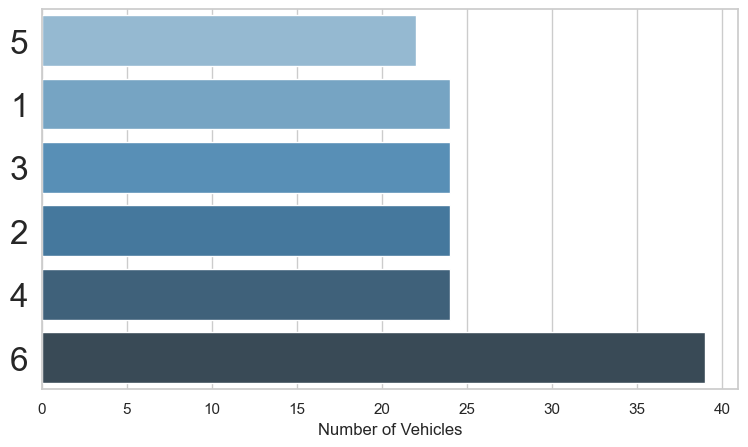

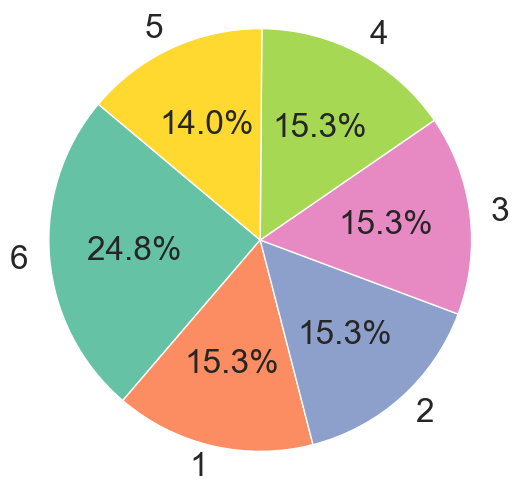

C:\Users\edgar\AppData\Local\Temp\ipykernel_336\2417150616.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series.values, y=series.index, palette="Blues_d")


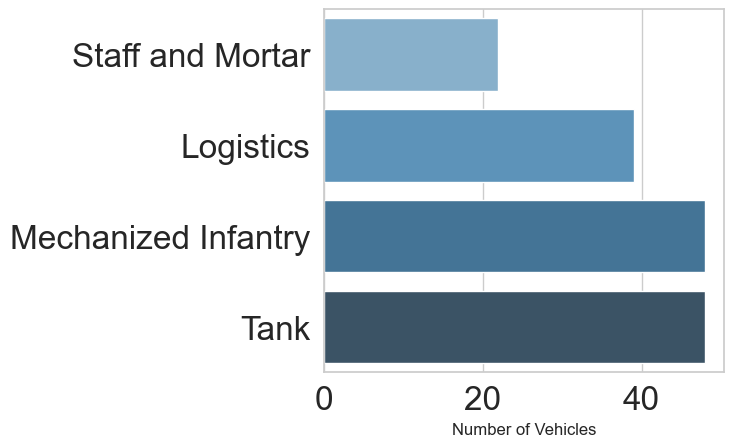

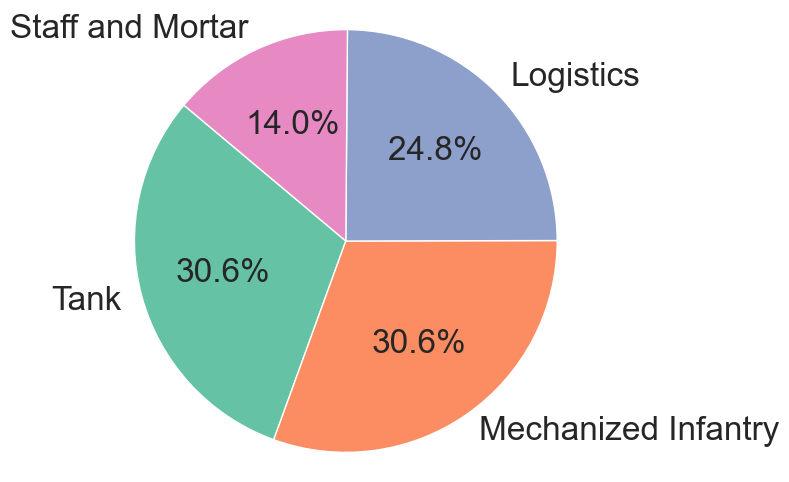

C:\Users\edgar\AppData\Local\Temp\ipykernel_336\2417150616.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series.values, y=series.index, palette="Blues_d")


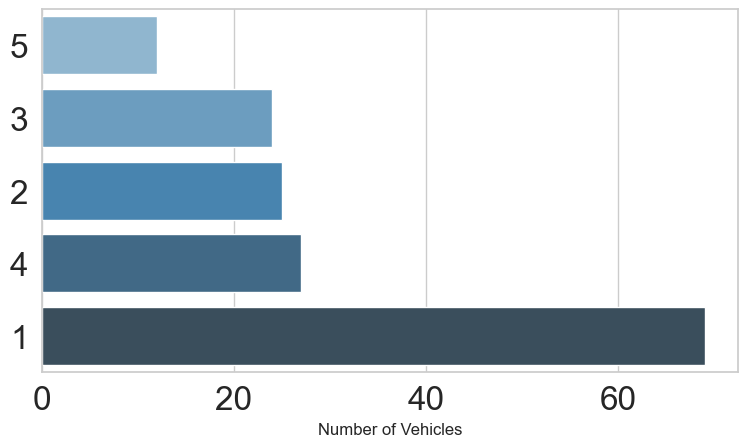

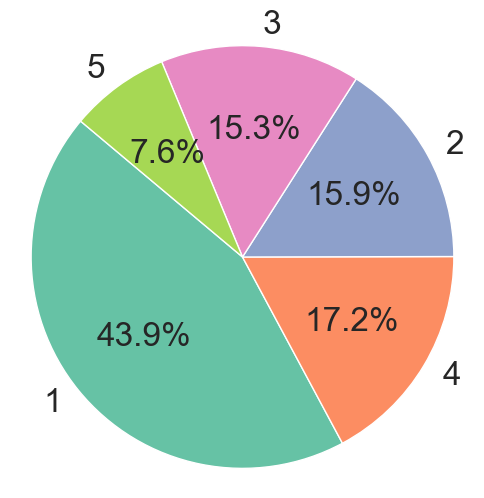

C:\Users\edgar\AppData\Local\Temp\ipykernel_336\2417150616.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series.values, y=series.index, palette="Blues_d")


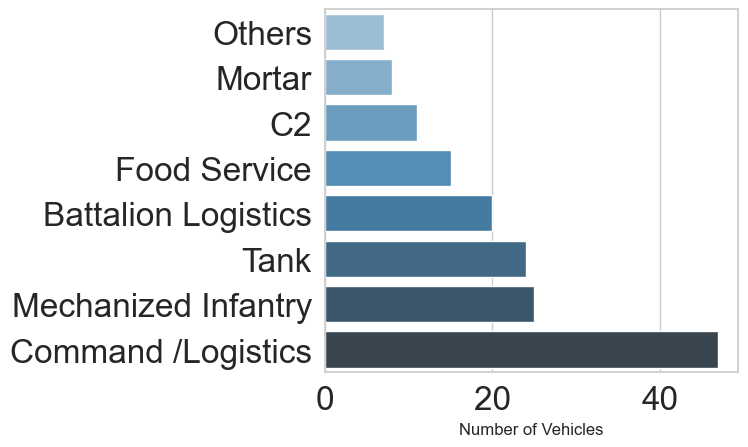

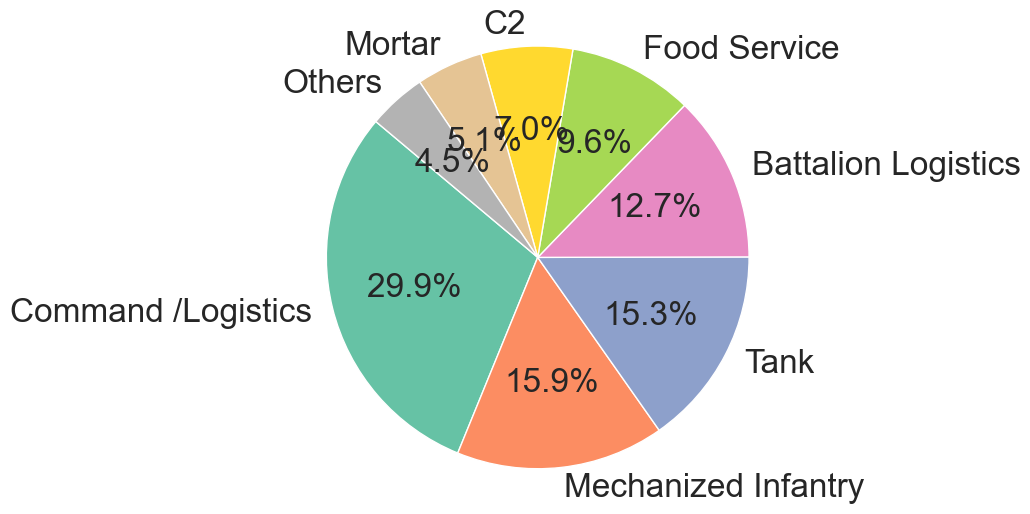

C:\Users\edgar\AppData\Local\Temp\ipykernel_336\2417150616.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series.values, y=series.index, palette="Blues_d")


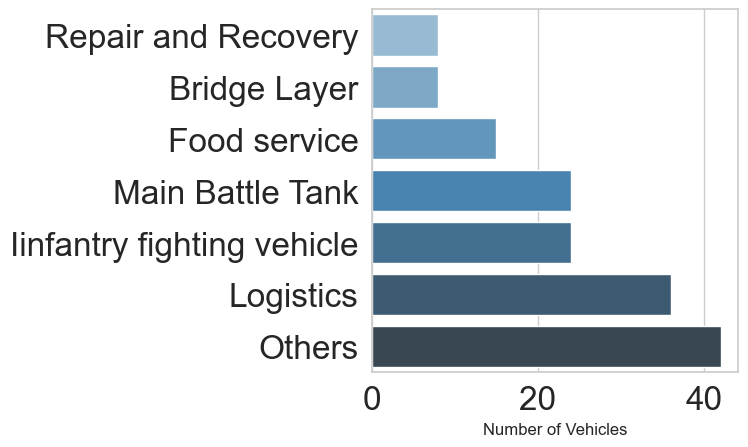

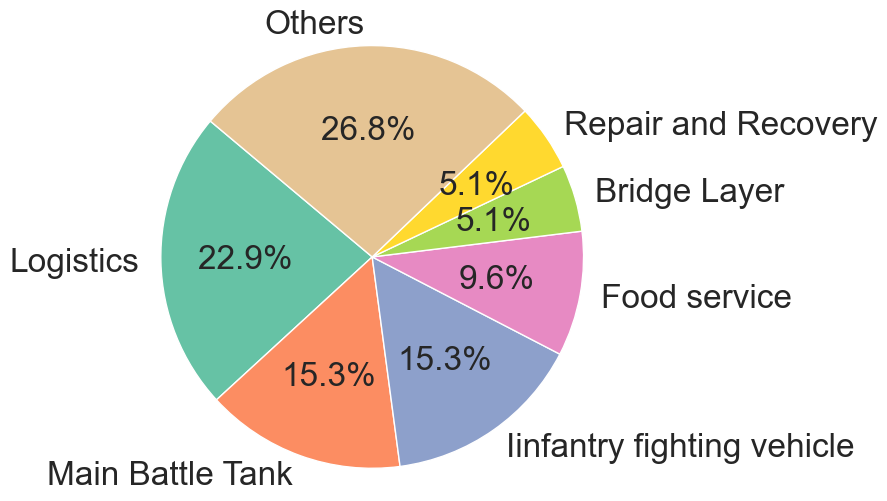

C:\Users\edgar\AppData\Local\Temp\ipykernel_336\2417150616.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series.values, y=series.index, palette="Blues_d")


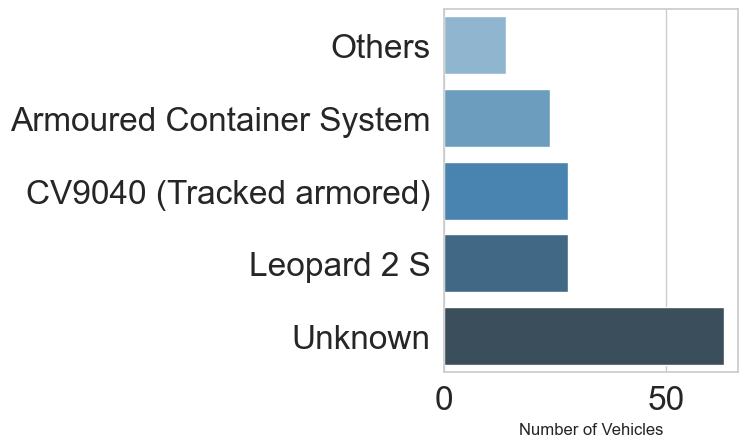

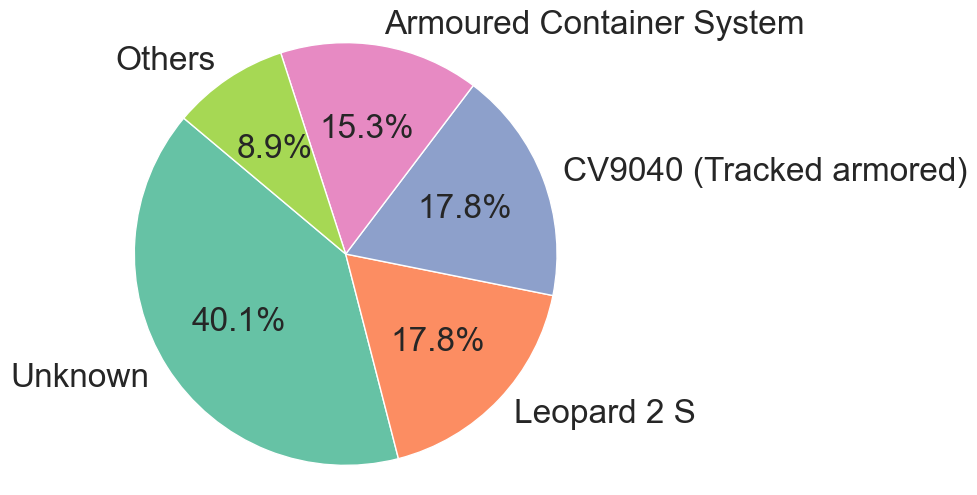

C:\Users\edgar\AppData\Local\Temp\ipykernel_336\2417150616.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=series.values, y=series.index, palette="Blues_d")


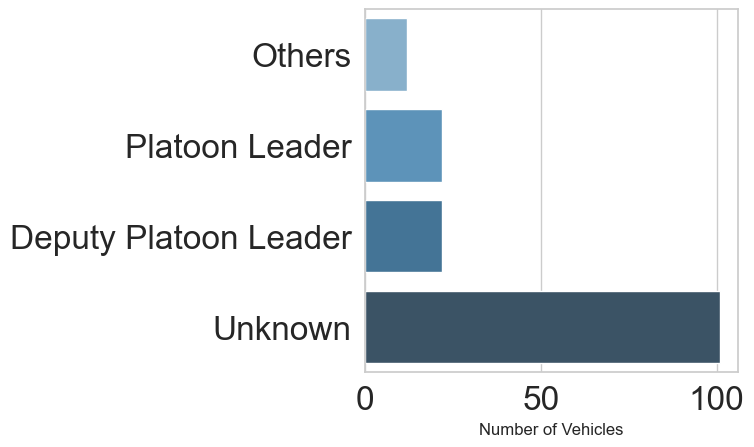

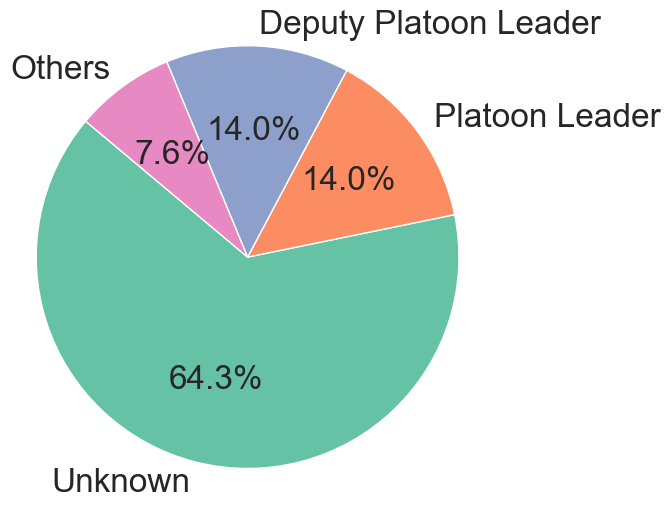

In [55]:
for category in [
        "Company",
        "Company Type",
        "Platoon",
        "Platoon Type",
        "Vehicle Function",
        "Vehicle Type",
        "Command",
    ]:
    plot_barh(enriched_trajectories_df[category].value_counts(), category)
    plot_pie(enriched_trajectories_df[category].value_counts(), category)